In [1]:
cat("PROPENSITY SCORE")

PROPENSITY SCORE

In [2]:
cat("

The propensity score is the probability that a unit (person, customer, patient) receives treatment, given their observed characteristics.

Mathematical Definition

e(X) = P(W = 1 | X)

Where:

e(X) = propensity score
W = treatment indicator (1 = treated, 0 = control)
X = observed covariates/features

Why Do We Need It?

The Problem: Selection Bias

In observational studies (non-randomized), treatment assignment isn't random. 
People who get treated are often systematically different from those who don't.

Example: Studying the effect of a new drug on recovery time

Sicker patients → more likely to get the drug
If we just compare treated vs. untreated, we're comparing apples to oranges

The Solution: Propensity Scores
The propensity score helps us:

Balance treatment groups - make them comparable
Control for confounding - adjust for systematic differences
Mimic randomization - create pseudo-random assignment

")



The propensity score is the probability that a unit (person, customer, patient) receives treatment, given their observed characteristics.

Mathematical Definition

e(X) = P(W = 1 | X)

Where:

e(X) = propensity score
W = treatment indicator (1 = treated, 0 = control)
X = observed covariates/features

Why Do We Need It?

The Problem: Selection Bias

In observational studies (non-randomized), treatment assignment isn't random. 
People who get treated are often systematically different from those who don't.

Example: Studying the effect of a new drug on recovery time

Sicker patients → more likely to get the drug
If we just compare treated vs. untreated, we're comparing apples to oranges

The Solution: Propensity Scores
The propensity score helps us:

Balance treatment groups - make them comparable
Control for confounding - adjust for systematic differences
Mimic randomization - create pseudo-random assignment



In [3]:
cat("

Key Theorem: The Balancing Property : Rosenbaum & Rubin (1983)

Translation: 

Within groups with the same propensity score, treatment is independent of covariates. 

The treated and control groups are balanced.

")



Key Theorem: The Balancing Property : Rosenbaum & Rubin (1983)

Translation: 

Within groups with the same propensity score, treatment is independent of covariates. 

The treated and control groups are balanced.



In [4]:
cat(" Propensity Score = Probability of receiving treatment given observed covariates
    
W = Treatment (1 = treated, 0 = control)
X = Covariates (age, BMI, smoking, etc.)

Why use it  ? Confounding !
")

cat("

Real-World Example: Exercise → Blood Pressure

Person Age BMI Smoker Exercise (W) BP (Y)
A  65  30  Yes 1  130 
B  30  22  No  0  118
")

 Propensity Score = Probability of receiving treatment given observed covariates
    
W = Treatment (1 = treated, 0 = control)
X = Covariates (age, BMI, smoking, etc.)

Why use it  ? Confounding !


Real-World Example: Exercise → Blood Pressure

Person Age BMI Smoker Exercise (W) BP (Y)
A  65  30  Yes 1  130 
B  30  22  No  0  118


In [5]:
cat(" Simple Example : Scenario: Job Training Program ")

# Simulate data
set.seed(123)
n <- 1000

data <- data.frame(
  age = rnorm(n, 35, 10),
  education = rnorm(n, 14, 2),
  prior_wage = rnorm(n, 30000, 10000)
)

# Treatment assignment is NOT random

# Younger, more educated people are more likely to get training
data$prob_treatment <- plogis(-2 + 0.05*data$age + 0.3*data$education + 0.00001*data$prior_wage)
data$treated <- rbinom(n, 1, data$prob_treatment)

# Outcome: post-training wage
true_effect <- 5000  # True causal effect
data$post_wage <- 20000 + 
  500*data$age + 
  2000*data$education + 
  0.5*data$prior_wage +
  data$treated * true_effect +
  rnorm(n, 0, 3000)

head(data, 5)
tail(data, 5)

# Check imbalance
library(dplyr)
data %>%
  group_by(treated) %>%
  summarise(
    n = n(),
    avg_age = mean(age),
    avg_education = mean(education),
    avg_prior_wage = mean(prior_wage)
  )

 Simple Example : Scenario: Job Training Program 

,age,education,prior_wage,prob_treatment,treated,post_wage
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,29.39524,12.008403,24883.96,0.9651464,1,80591.41
2,32.69823,11.920090,32369.38,0.9716573,1,77153.62
3,50.58708,13.964040,24584.11,0.9930663,1,84861.76
4,35.70508,13.735650,42192.28,0.9869763,1,90587.88
5,36.29288,8.901314,31741.36,0.9428082,1,78111.03


,age,education,prior_wage,prob_treatment,treated,post_wage
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
996,34.10025,14.15329,40609.66,0.9873466,1,90225.07
997,45.70516,14.51033,25544.94,0.9925629,1,89431.45
998,21.48900,14.55489,25708.20,0.9758258,1,79566.98
999,29.77383,15.07371,41890.12,0.9882224,1,91362.37
1000,32.50809,13.07903,38342.94,0.9807828,1,84701.44



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




treated,n,avg_age,avg_education,avg_prior_wage
<int>,<int>,<dbl>,<dbl>,<dbl>
0,17,28.25244,13.00129,31729.19
1,983,35.28076,14.10367,29765.49


In [6]:
# Result: Treated group is younger and more educated → biased comparison!

In [7]:
cat("Estimating Propensity Scores")

Estimating Propensity Scores

In [8]:
cat('

You have observational data, not a randomized experiment.

That means:

Some people were more likely to be treated (e.g., training program, exercise, coupon, drug)

Others more likely to be controls

This creates confounding.

To fix that, we need to estimate each person’s probability of receiving treatment, given their observed characteristics.

That probability is called the PROPENSITY SCORE.

🧠 Why do we fit a logistic regression?

Because:

✔️ Propensity score = P(treated=1∣X)
✔️ Logistic regression directly models probability of treatment.

Your model:

ps_model <- glm(treated ~ age + education + prior_wage,
                data = data,
                family = binomial(link = "logit"))

Is estimating:

P(treated=1∣age, education, prior_wage)

i.e.:

“Given your age, education, and prior wage, what is your probability of being put in the treated group?”

This is exactly the definition of the PROPENSITY SCORE.

🎯 Why does logistic regression work?

Because:

Logistic regression outputs values between 0 and 1

It gives a probability of treatment

It uses the covariates that may cause selection bias

📌 Why do we use the predicted probabilities as propensity scores?

This line:

data$propensity_score <- predict(ps_model, type = "response")

The type = "response" part tells R:

“Give me the predicted probability, not the log-odds.”

| Person | Age | Education   | Prior wage | Propensity score |
| ------ | --- | ----------- | ---------- | ---------------- |
| 1      | 22  | High School | 18k        | 0.18             |
| 2      | 45  | B.S.        | 55k        | 0.72             |
| 3      | 30  | M.S.        | 90k        | 0.85             |

Meaning:

Person 1 has 18% chance of being treated

Person 2 has 72% chance

Person 3 has 85% chance

')



You have observational data, not a randomized experiment.

That means:

Some people were more likely to be treated (e.g., training program, exercise, coupon, drug)

Others more likely to be controls

This creates confounding.

To fix that, we need to estimate each person’s probability of receiving treatment, given their observed characteristics.

That probability is called the PROPENSITY SCORE.

🧠 Why do we fit a logistic regression?

Because:

✔️ Propensity score = P(treated=1∣X)
✔️ Logistic regression directly models probability of treatment.

Your model:

ps_model <- glm(treated ~ age + education + prior_wage,
                data = data,
                family = binomial(link = "logit"))

Is estimating:

P(treated=1∣age, education, prior_wage)

i.e.:

“Given your age, education, and prior wage, what is your probability of being put in the treated group?”

This is exactly the definition of the PROPENSITY SCORE.

🎯 Why does logistic regression work?

Because:

Logistic regression o


Call:  glm(formula = treated ~ age + education + prior_wage, family = binomial(link = "logit"), 
    data = data)

Coefficients:
(Intercept)          age    education   prior_wage  
 -8.531e-01    6.855e-02    2.481e-01   -2.041e-05  

Degrees of Freedom: 999 Total (i.e. Null);  996 Residual
Null Deviance:	    172.2 
Residual Deviance: 159.1 	AIC: 167.1

,age,education,prior_wage,prob_treatment,treated,post_wage,propensity_score
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,29.39524,12.008403,24883.96,0.9651464,1,80591.41,0.9742382
2,32.69823,11.920090,32369.38,0.9716573,1,77153.62,0.9755050
3,50.58708,13.964040,24584.11,0.9930663,1,84861.76,0.9962290
4,35.70508,13.735650,42192.28,0.9869763,1,90587.88,0.9843341
5,36.29288,8.901314,31741.36,0.9428082,1,78111.03,0.9606410


,age,education,prior_wage,prob_treatment,treated,post_wage,propensity_score
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
996,34.10025,14.15329,40609.66,0.9873466,1,90225.07,0.9847284
997,45.70516,14.51033,25544.94,0.9925629,1,89431.45,0.9953113
998,21.48900,14.55489,25708.20,0.9758258,1,79566.98,0.9760060
999,29.77383,15.07371,41890.12,0.9882224,1,91362.37,0.9832422
1000,32.50809,13.07903,38342.94,0.9807828,1,84701.44,0.9788972


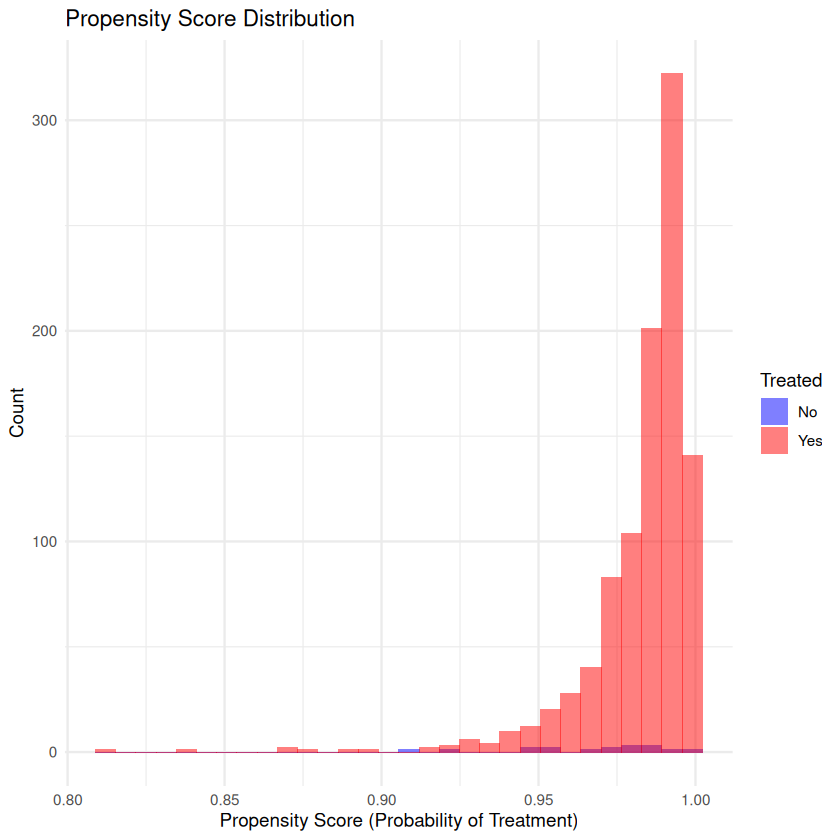

In [9]:
# Fit logistic regression
ps_model <- glm(treated ~ age + education + prior_wage,
                data = data,
                family = binomial(link = "logit"))
ps_model

# Get propensity scores
data$propensity_score <- predict(ps_model, type = "response")

head(data, 5)
tail(data, 5)

# Visualize
library(ggplot2)
ggplot(data, aes(x = propensity_score, fill = factor(treated))) +
  geom_histogram(alpha = 0.5, position = "identity", bins = 30) +
  labs(
    title = "Propensity Score Distribution",
    x = "Propensity Score (Probability of Treatment)",
    y = "Count",
    fill = "Treated"
  ) +
  scale_fill_manual(values = c("0" = "blue", "1" = "red"),
                    labels = c("No", "Yes")) +
  theme_minimal()

In [10]:
cat("

The plots shows :

Red = treated group

Blue = control group

What you look for:

Do treated and control overlap?

If yes → matching is possible

If no → extreme confounding (bad)

Which covariates drive treatment assignment?

If matching or weighting will work well

Good overlap = good causal identification

Poor overlap = unstable estimates

")

cat("

📝 Summary in one sentence

We fit a logistic regression to estimate each person’s probability of receiving treatment (the propensity score), 
and we visualize these scores to understand how much treated and control groups overlap — 
and whether matching / weighting will produce valid causal estimates.
    
")



The plots shows :

Red = treated group

Blue = control group

What you look for:

Do treated and control overlap?

If yes → matching is possible

If no → extreme confounding (bad)

Which covariates drive treatment assignment?

If matching or weighting will work well

Good overlap = good causal identification

Poor overlap = unstable estimates



📝 Summary in one sentence

We fit a logistic regression to estimate each person’s probability of receiving treatment (the propensity score), 
and we visualize these scores to understand how much treated and control groups overlap — 
and whether matching / weighting will produce valid causal estimates.
    


In [11]:
cat("Methods Using Propensity Scores")

Methods Using Propensity Scores

In [12]:
cat("

1. Matching

Idea: Match each treated unit with a control unit that has a similar propensity score.

")



1. Matching

Idea: Match each treated unit with a control unit that has a similar propensity score.



In [13]:
# ?matchit

# matchit() is the main function of MatchIt and performs pairing, subset selection, and subclassification 
# with the aim of creating treatment and control groups balanced on included covariates. 

# MatchIt implements the suggestions of Ho, Imai, King, and Stuart (2007) for improving parametric statistical models 
# by preprocessing data with nonparametric matching methods.

# matchit(
#  formula,
#  data = NULL,
#  method = "nearest",
#  distance = "glm",
#  link = "logit"



In [14]:
library(MatchIt)

# Perform propensity score matching
matched <- matchit(treated ~ age + education + prior_wage,
                   data = data,
                   method = "nearest",  # nearest neighbor matching
                   ratio = 1,           # 1:1 matching
                   caliper = 0.1)       # maximum distance

matched

# Get matched data
matched_data <- match.data(matched)
head(matched_data, 5)

# Check balance after matching
matched_data %>%
  group_by(treated) %>%
  summarise(
    n = n(),
    avg_age = mean(age),
    avg_education = mean(education),
    avg_prior_wage = mean(prior_wage)
  )

head(matched_data[c("treated", "distance", "weights", "subclass")])

cat('

distance = the propensity score (P(treated=1|X))

weights = matching weights

subclass = matched pair/stratum id

')

Warning message:
“Fewer control units than treated units; not all treated units will get
a match.”


A `matchit` object
 - method: 1:1 nearest neighbor matching without replacement
 - distance: Propensity score [caliper]

             - estimated with logistic regression
 - caliper: <distance> (0.002)
 - number of obs.: 1000 (original), 32 (matched)
 - target estimand: ATT
 - covariates: age, education, prior_wage

,age,education,prior_wage,prob_treatment,treated,post_wage,propensity_score,distance,weights,subclass
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
9,28.13147,15.37040,50460.19,0.9892527,0,86539.98,0.9793281,0.9793281,1,16
14,36.10683,14.93806,37516.29,0.9906402,1,91855.70,0.9896640,0.9896640,1,1
18,15.33383,11.47620,29511.23,0.9244681,1,72262.66,0.9200055,0.9200055,1,2
47,30.97115,11.37310,29400.82,0.9628343,1,83618.97,0.9704307,0.9704307,1,3
57,19.51247,12.38709,29295.85,0.9518786,1,74450.24,0.9506970,0.9506970,1,4


treated,n,avg_age,avg_education,avg_prior_wage
<int>,<int>,<dbl>,<dbl>,<dbl>
0,16,28.65385,13.18067,31140.10
1,16,27.59855,13.87971,30066.25


,treated,distance,weights,subclass
,<int>,<dbl>,<dbl>,<fct>
9,0,0.9793281,1,16
14,1,0.9896640,1,1
18,1,0.9200055,1,2
47,1,0.9704307,1,3
57,1,0.9506970,1,4
61,1,0.9943749,1,5




distance = the propensity score (P(treated=1|X))

weights = matching weights

subclass = matched pair/stratum id



1         2         3         4         5         6 
0.9742382 0.9755050 0.9962290 0.9843341 0.9606410 0.9980227

1        2        3        4        5        6 
3.632761 3.684488 5.576649 4.140482 3.194875 6.224034


Call:
matchit(formula = treated ~ age + education + prior_wage, data = data, 
    method = "nearest", caliper = 0.1, ratio = 1)

Summary of Balance for All Data:
           Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance          0.9833        0.9668          0.9482     0.4966    0.2459
age              35.2808       28.2524          0.7101     1.2728    0.2183
education        14.1037       13.0013          0.5459     1.3493    0.1615
prior_wage    29765.4919    31729.1875         -0.2009     0.8680    0.0606
           eCDF Max
distance     0.4402
age          0.4371
education    0.3307
prior_wage   0.1698

Summary of Balance for Matched Data:
           Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance          0.9720        0.9703          0.0959     1.0067    0.0338
age              27.5986       28.6538         -0.1066     0.9494    0.0487
education        13.8797       13.1807          0.3461     1.8835    0.1115
prior_wage    3

To identify the units, use first mouse button; to stop, use second.


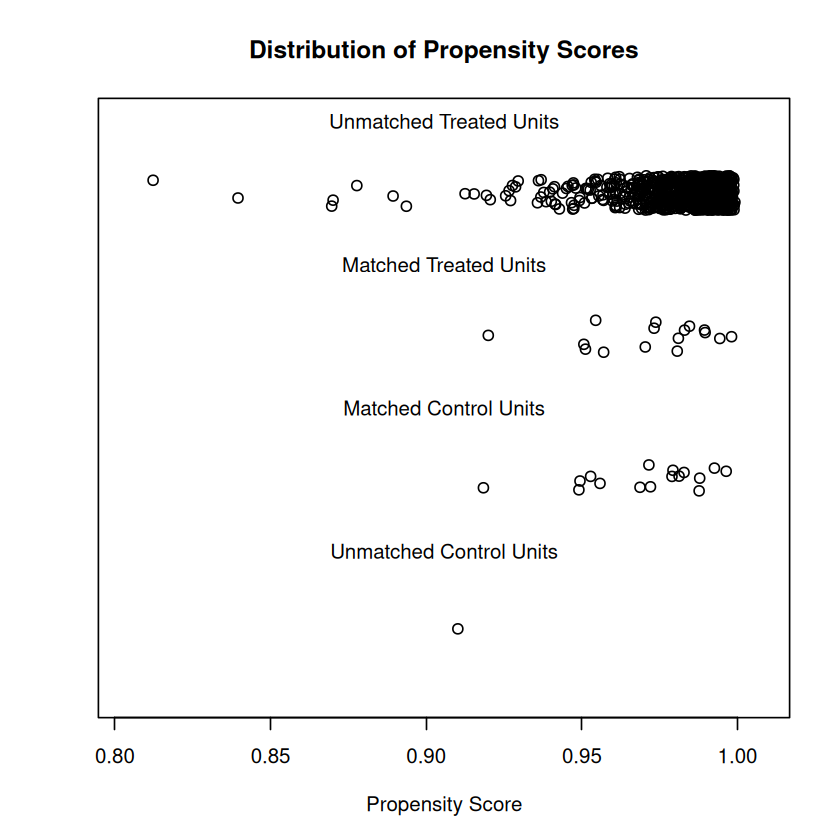

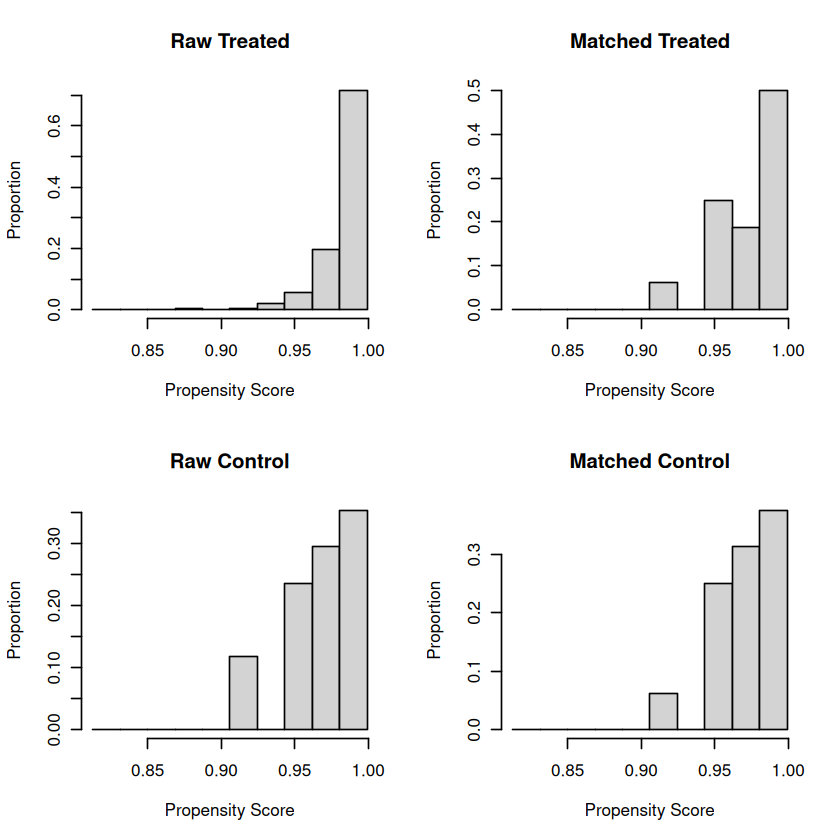

In [15]:
# Extract PS directly

ps <- matched$distance
head(ps)

logit_ps <- predict(matched$model, type = "link")
head(logit_ps)

summary(matched)                 # balance summary
plot(matched, type = "jitter")   # PS overlap before/after
plot(matched, type = "hist")     # PS histograms


In [16]:
# Estimate treatment effect on matched data

ate_matched <- lm(post_wage ~ treated, data = matched_data)
summary(ate_matched)

cat("\nEstimated Treatment Effect (Matching):", 
    round(coef(ate_matched)["treated"], 2), "\n")
cat("True Effect:", true_effect, "\n")

# “After we’ve balanced treated and control groups by matching on similar covariates, what is the average difference in outcome?”
# That difference ≈ the causal treatment effect, assuming:
# Covariate balance achieved (no confounding left),


Call:
lm(formula = post_wage ~ treated, data = matched_data)

Residuals:
   Min     1Q Median     3Q    Max 
-15596  -6297  -2572   6513  18103 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    75756       2160  35.076   <2e-16 ***
treated         5729       3054   1.876   0.0705 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8639 on 30 degrees of freedom
Multiple R-squared:  0.105,	Adjusted R-squared:  0.07513 
F-statistic: 3.518 on 1 and 30 DF,  p-value: 0.07046



Estimated Treatment Effect (Matching): 5728.97 
True Effect: 5000 


In [17]:
cat("NOTE")

cat('

matched <- matchit(treated ~ age + education + prior_wage,
                   data = data,
                   method = "nearest",
                   distance = "mahalanobis")

Here:

You are not using the propensity score.

Instead, treated and control units are matched using Mahalanobis distance on the covariates (age, education, prior_wage).

This means each treated unit is paired with the control unit that has the smallest multivariate distance in those covariates.

')

cat('

The Mahalanobis distance measures the distance between two vectors, 

taking into account the correlations among the variables.

Alternative

distance = "logit" → match on propensity scores (default).

')

NOTE

matched <- matchit(treated ~ age + education + prior_wage,
                   data = data,
                   method = "nearest",
                   distance = "mahalanobis")

Here:

You are not using the propensity score.

Instead, treated and control units are matched using Mahalanobis distance on the covariates (age, education, prior_wage).

This means each treated unit is paired with the control unit that has the smallest multivariate distance in those covariates.



The Mahalanobis distance measures the distance between two vectors, 

taking into account the correlations among the variables.

Alternative

distance = "logit" → match on propensity scores (default).



In [18]:
cat(" 

2. Inverse Probability Weighting (IPW)

Idea: Weight observations by the inverse of their probability of receiving the treatment they actually received.

")

 

2. Inverse Probability Weighting (IPW)

Idea: Weight observations by the inverse of their probability of receiving the treatment they actually received.



In [19]:
cat("

Idea behind IPTW

Inverse Probability of Treatment Weighting creates a pseudo-population in which treatment assignment is independent of the covariates.

Treated units with low propensity (unlikely to be treated) get large weight

Controls with high propensity (unlikely to be untreated) get large weight

This makes the reweighted sample look as if treatment was randomized.

")



Idea behind IPTW

Inverse Probability of Treatment Weighting creates a pseudo-population in which treatment assignment is independent of the covariates.

Treated units with low propensity (unlikely to be treated) get large weight

Controls with high propensity (unlikely to be untreated) get large weight

This makes the reweighted sample look as if treatment was randomized.



In [20]:
# Compute IPW weights

data$ipw_weight <- ifelse(data$treated == 1,
                          1 / data$propensity_score,          # For treated
                          1 / (1 - data$propensity_score))    # For control

# Trim extreme weights (optional but recommended)
data$ipw_weight_trimmed <- pmin(data$ipw_weight, quantile(data$ipw_weight, 0.99))

# Estimate ATE using IPW

library(survey)

design_ipw <- svydesign(ids = ~1, weights = ~ipw_weight_trimmed, data = data)

ate_ipw <- svyglm(post_wage ~ treated, design = design_ipw)

cat("\nEstimated Treatment Effect (IPW):", 
    round(coef(ate_ipw)["treated"], 2), "\n")

cat("True Effect:", true_effect, "\n")

# How IPW works:

# Treated units with low propensity (unlikely to be treated) get high weight → upweight rare cases
# Control units with high propensity (likely to be treated but weren't) get high weight → upweight rare cases
# This creates a "pseudo-population" where treatment is independent of X

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart





Estimated Treatment Effect (IPW): 8966.64 
True Effect: 5000 


In [21]:
cat(" Stratification (Subclassification) ")

 Stratification (Subclassification) 

In [22]:
cat(" Divide data into strata based on propensity score, estimate effect within each stratum, then average. ")

 Divide data into strata based on propensity score, estimate effect within each stratum, then average. 

In [23]:
# data$propensity_score

In [24]:
# 1) Fit the propensity score model (logistic regression)
ps_model <- glm(treated ~ age + education + prior_wage,
                data = data, family = binomial())

# 2) Get the propensity scores p = P(treated = 1 | X)
data$propensity_score <- predict(ps_model, type = "response")  # numeric in (0,1)

# (optional but recommended) clip extremes to avoid 0/1
eps <- 1e-4
data$propensity_score <- pmin(pmax(data$propensity_score, eps), 1 - eps)

# Quick sanity checks
summary(data$propensity_score)
stopifnot(is.numeric(data$propensity_score), all(is.finite(data$propensity_score)))

# Create propensity score quintiles
data$ps_stratum <- cut(data$propensity_score,
                       breaks = quantile(data$propensity_score, probs = seq(0, 1, 0.2)),
                       include.lowest = TRUE,
                       labels = 1:5)

# Estimate effect within each stratum
stratum_effects <- data %>%
  group_by(ps_stratum) %>%
  summarise(
    n = n(),
    effect = mean(post_wage[treated == 1]) - mean(post_wage[treated == 0]),
    .groups = 'drop'
  )

print(stratum_effects)

# Overall ATE (weighted average)
ate_stratified <- weighted.mean(stratum_effects$effect, 
                                stratum_effects$n)

cat("\nEstimated Treatment Effect (Stratification):", 
    round(ate_stratified, 2), "\n")
cat("True Effect:", true_effect, "\n")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8123  0.9779  0.9885  0.9830  0.9936  0.9992 

# A tibble: 5 × 3
  ps_stratum     n effect
  <fct>      <int>  <dbl>
1 1            200  5995.
2 2            200  4978.
3 3            200  8547.
4 4            200 10920.
5 5            200  -862.

Estimated Treatment Effect (Stratification): 5915.68 
True Effect: 5000 


In [25]:
cat(" Assessing Balance ")

cat("after using propensity scores, we need to check if balance improved")

 Assessing Balance after using propensity scores, we need to check if balance improved

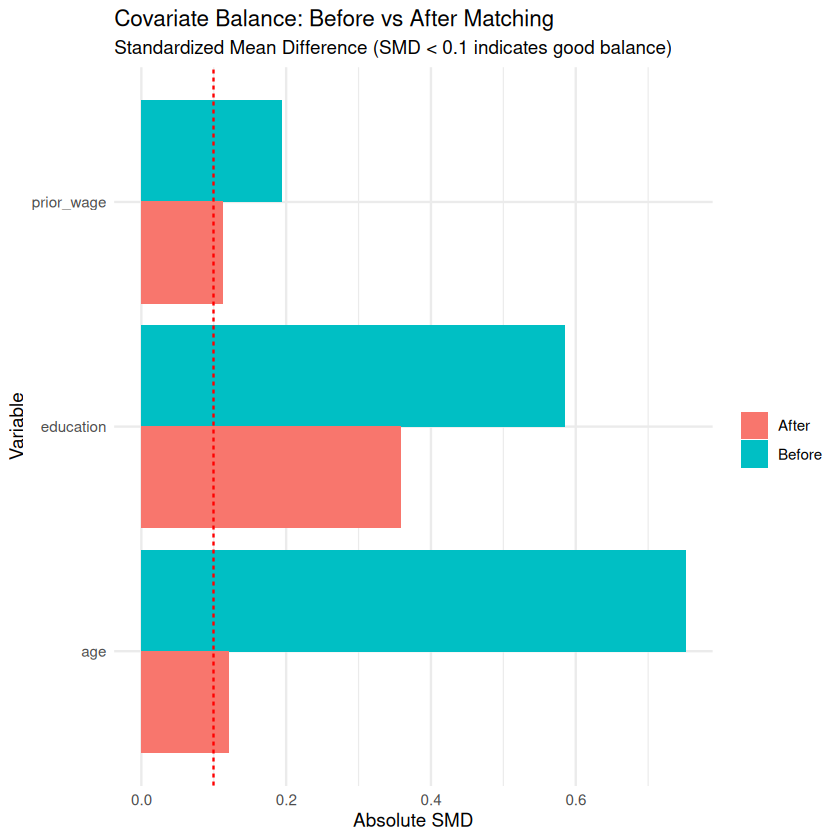

In [26]:
# Function to compute standardized mean difference
compute_smd <- function(data, var, treat_var = "treated") {
  treated_mean <- mean(data[[var]][data[[treat_var]] == 1])
  control_mean <- mean(data[[var]][data[[treat_var]] == 0])
  pooled_sd <- sqrt((var(data[[var]][data[[treat_var]] == 1]) + 
                     var(data[[var]][data[[treat_var]] == 0])) / 2)
  smd <- (treated_mean - control_mean) / pooled_sd
  return(smd)
}

# Before matching
smd_before <- data.frame(
  variable = c("age", "education", "prior_wage"),
  smd = c(
    compute_smd(data, "age"),
    compute_smd(data, "education"),
    compute_smd(data, "prior_wage")
  )
)

# After matching
smd_after <- data.frame(
  variable = c("age", "education", "prior_wage"),
  smd = c(
    compute_smd(matched_data, "age"),
    compute_smd(matched_data, "education"),
    compute_smd(matched_data, "prior_wage")
  )
)

# Plot balance
library(ggplot2)
balance_data <- rbind(
  data.frame(smd_before, timing = "Before"),
  data.frame(smd_after, timing = "After")
)

ggplot(balance_data, aes(x = variable, y = abs(smd), fill = timing)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_hline(yintercept = 0.1, linetype = "dashed", color = "red") +
  labs(
    title = "Covariate Balance: Before vs After Matching",
    subtitle = "Standardized Mean Difference (SMD < 0.1 indicates good balance)",
    x = "Variable",
    y = "Absolute SMD",
    fill = ""
  ) +
  theme_minimal() +
  coord_flip()

Another example : GrokFirst 5 rows:
       age      bmi smoking W propensity        Y
1 34.37888 23.99054       0 0 0.06415728 160.5012
2 59.41526 22.03151       1 0 0.09687952 177.3134
3 40.44885 32.13393       0 0 0.03950771 171.6538
4 64.15087 30.75531       0 0 0.13377480 182.2968
5 67.02336 19.45417       0 0 0.35566064 173.7402
6 22.27782 26.52426       0 0 0.02823546 157.1876
       age      bmi smoking W propensity        Y         ps
1 34.37888 23.99054       0 0 0.06415728 160.5012 0.06260537
2 59.41526 22.03151       1 0 0.09687952 177.3134 0.04558813
3 40.44885 32.13393       0 0 0.03950771 171.6538 0.03310450
4 64.15087 30.75531       0 0 0.13377480 182.2968 0.09091845
5 67.02336 19.45417       0 0 0.35566064 173.7402 0.28146104
6 22.27782 26.52426       0 0 0.02823546 157.1876 0.03057375


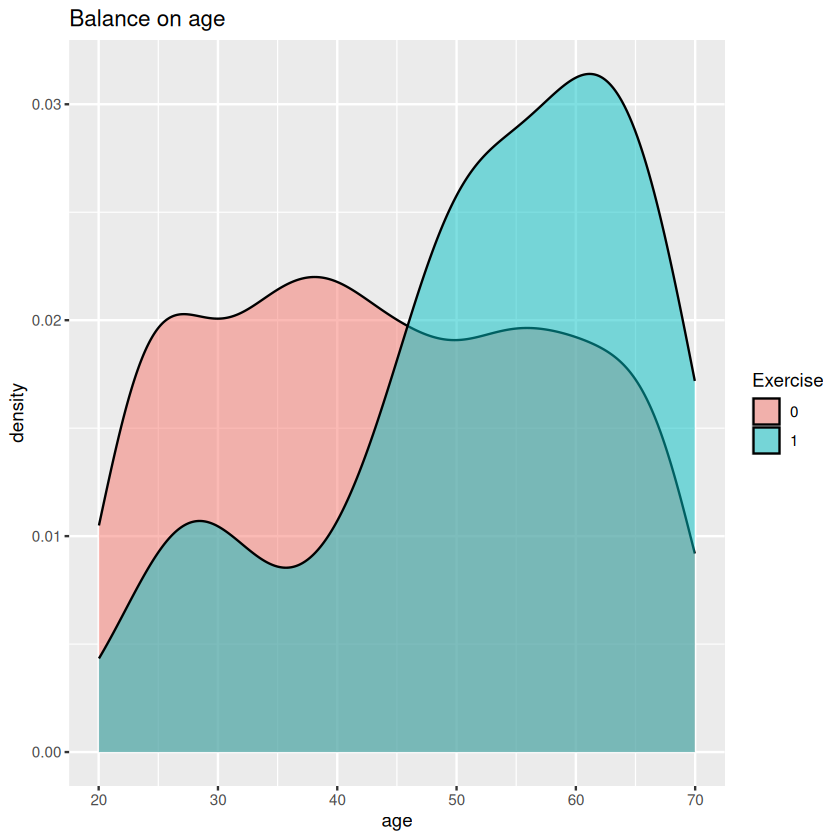

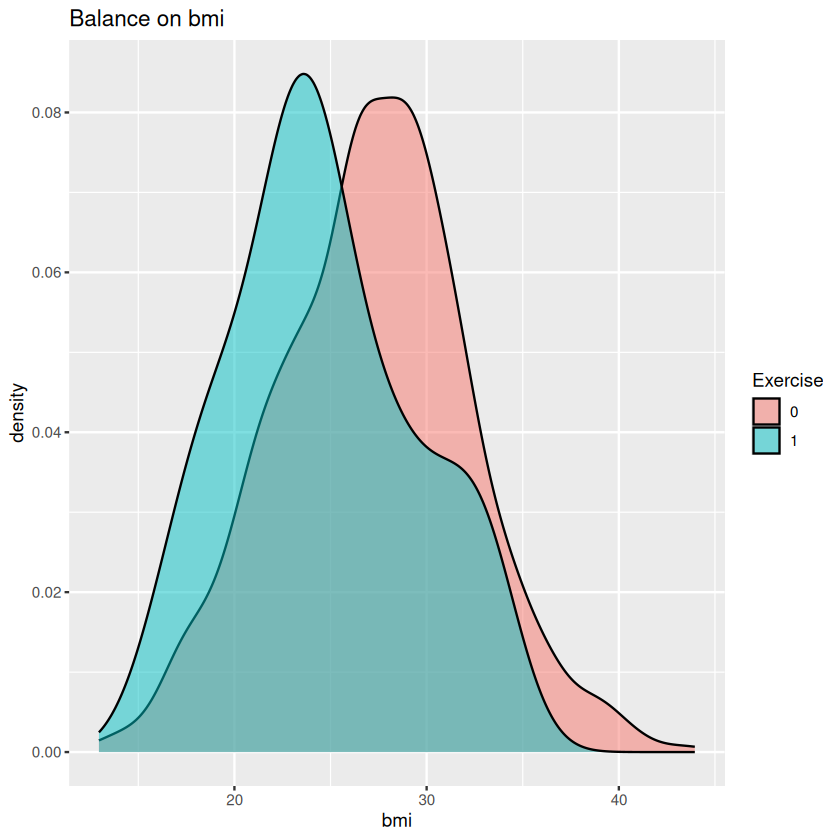


ATE (Matched) = -8.05 mmHg
ATE (IPTW) = -6.74 mmHg


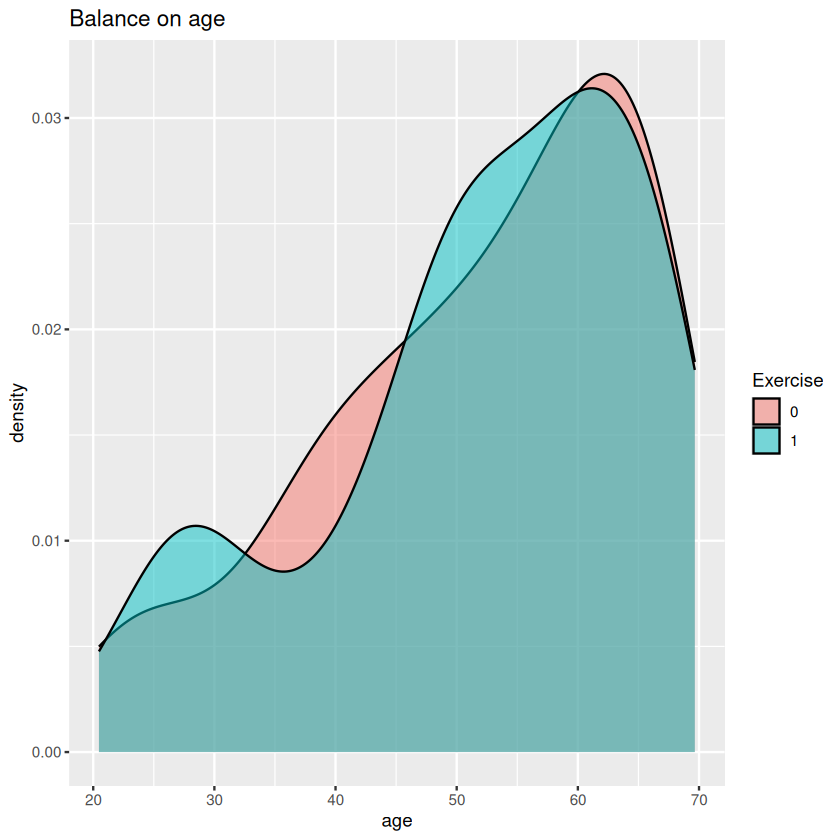

In [27]:
cat("Another example : Grok")


# ===============================================
# PROPENSITY SCORE: Exercise → Blood Pressure
# ===============================================

library(dplyr)
library(MatchIt)
library(ggplot2)

# --- 1. SIMULATE DATA ---
set.seed(123)
n <- 1000

data <- data.frame(
  age = runif(n, 20, 70),
  bmi = rnorm(n, 27, 5),
  smoking = rbinom(n, 1, 0.3),
  W = 0  # Will be assigned
)

# People more likely to exercise: younger, lower BMI, non-smokers
logit_p <- -2 + 0.05*data$age - 0.1*data$bmi - 1*data$smoking
data$propensity <- plogis(logit_p)
data$W <- rbinom(n, 1, data$propensity)

# Outcome: exercise lowers BP, but confounders
data$Y <- 120 + 0.5*data$age + 1*data$bmi + 5*data$smoking - 8*data$W + rnorm(n)

cat("First 5 rows:\n")
print(head(data))

# --- 2. ESTIMATE PROPENSITY SCORE ---
ps_model <- glm(W ~ age + bmi + smoking, data = data, family = binomial)
data$ps <- predict(ps_model, type = "response")
print(head(data))

# --- 3. CHECK BALANCE BEFORE/AFTER ---
balance_plot <- function(data, var) {
  ggplot(data, aes(x = !!sym(var), fill = factor(W))) +
    geom_density(alpha = 0.5) +
    labs(title = paste("Balance on", var), fill = "Exercise")
}

print(balance_plot(data, "age"))
print(balance_plot(data, "bmi"))

# --- 4. PROPENSITY SCORE MATCHING ---
match_out <- matchit(W ~ age + bmi + smoking, data = data, method = "nearest", ratio = 1)
matched_data <- match.data(match_out)

# --- 5. CHECK BALANCE AFTER MATCHING ---
print(balance_plot(matched_data, "age"))

# --- 6. ESTIMATE TREATMENT EFFECT ---
ate_matched <- lm(Y ~ W, data = matched_data)$coefficients["W"]
cat("\nATE (Matched) =", round(ate_matched, 2), "mmHg\n")

# --- 7. IPTW (Inverse Probability of Treatment Weighting) ---
data$weight <- ifelse(data$W == 1, 1/data$ps, 1/(1-data$ps))
ate_iptw <- weighted.mean(data$Y[data$W==1], data$weight[data$W==1]) - 
            weighted.mean(data$Y[data$W==0], data$weight[data$W==0])
cat("ATE (IPTW) =", round(ate_iptw, 2), "mmHg\n")
